In [32]:
#기본정보 확인
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('./airline_stats.csv')
df 
#값 확인

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


In [6]:
df.info() #데이터 타입확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [50]:
#데이터 요약
df.describe() 

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [ ]:
# 결측치 확인

missing_per_col = df.isnull().sum()
print(missing_per_col)
# 결측치가 있지만 전체 33467에 비하면 미미한 수준이라 통계적으로는 큰 의미를 가지지 못한다.

pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64


In [12]:
# 결측치 처리 > 방법 설명
df1 =df.dropna() #결측치가 있는 행을 지운다.


(array([5725.,    0.,    0.,    0., 3851.,    0.,    0.,    0., 3775.,
           0.,    0.,    0., 9107.,    0.,    0.,    0., 5426.,    0.,
           0., 5584.]),
 array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25, 2.5 ,
        2.75, 3.  , 3.25, 3.5 , 3.75, 4.  , 4.25, 4.5 , 4.75, 5.  ]),
 <BarContainer object of 20 artists>)

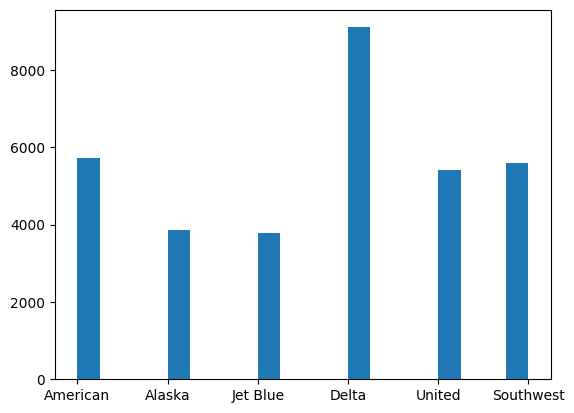

In [ ]:
# 시각적 분석

#1. 히스토그램
plt.hist(data=df,  x='airline',bins=20)
#각 항공사들은 아래와같이 분포해있고 Delta 항공사가 압도적으로 많으며 
#United, Southwest, American 항공사가 비슷하고 , 나머지 Alsska, jetblue 등이 비슷하다 
#   따라서 이후 통계 분석시에 Delta값이 특별히 많이 나와도 이는 델타항공사가 많아서 나오는 결과이므로 다시한번 생각해볼 필요가 있다.

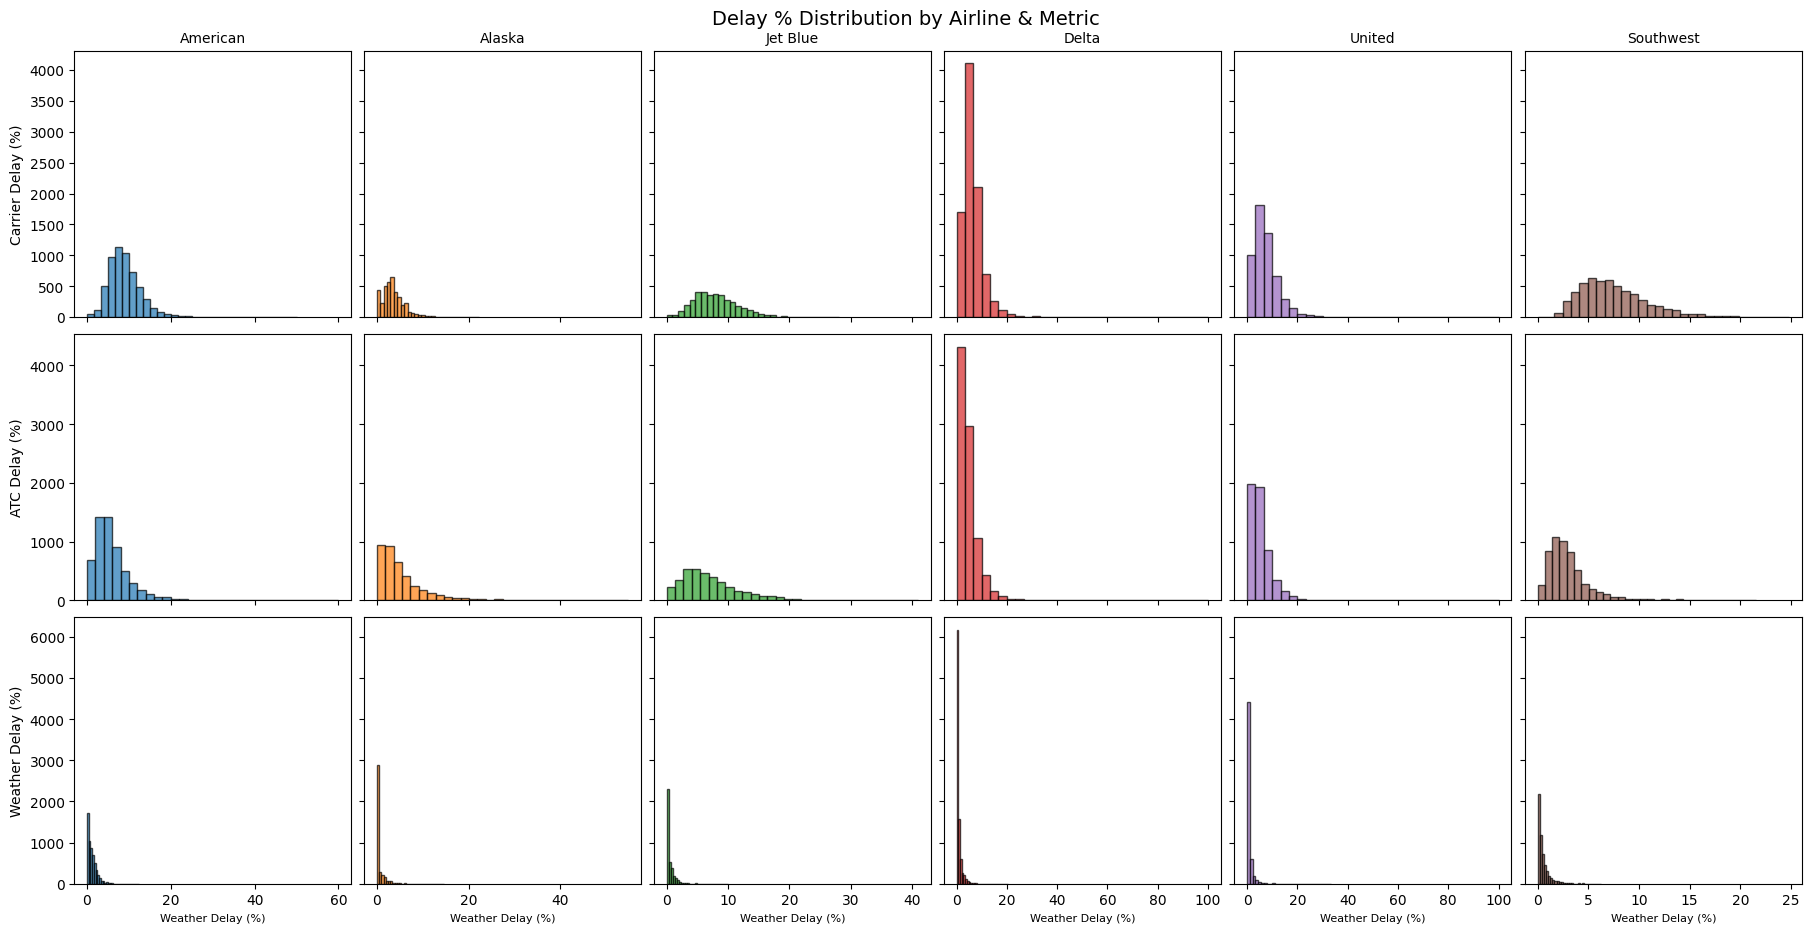

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 2) 변수 정의
metrics = ['pct_carrier_delay','pct_atc_delay','pct_weather_delay']
titles  = ['Carrier Delay (%)','ATC Delay (%)','Weather Delay (%)']
airlines = df['airline'].unique().tolist()

# 3) subplot 그리드 세팅 (3행 × N열)
n_rows, n_cols = len(metrics), len(airlines)
fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(3*n_cols, 3*n_rows),
    sharex='col',     # 같은 열끼리는 x축 공유
    sharey='row',     # 같은 행끼리는 y축 공유
    constrained_layout=True
)

# 4) 각 셀에 히스토그램 그리기
for i, metric in enumerate(metrics):
    for j, airline in enumerate(airlines):
        ax = axes[i, j] if n_rows>1 and n_cols>1 else (axes[j] if n_rows==1 else axes[i])
        data = df[df['airline']==airline][metric]
        
        ax.hist(data, bins=30, edgecolor='black', color='C{}'.format(j), alpha=0.7)
        ax.grid(False)
        # 컬럼(airline) 제목
        if i == 0:
            ax.set_title(airline, fontsize=10)
        # 행(metric) y축 라벨
        if j == 0:
            ax.set_ylabel(titles[i], fontsize=10)
        # 맨 아래 행에만 x축 라벨
        if i == n_rows-1:
            ax.set_xlabel(titles[i], fontsize=8)

# 5) 전체 타이틀
fig.suptitle('Delay % Distribution by Airline & Metric', fontsize=14, y=1.02)
plt.show()

## 지연율 및 빈도 분석

델타 항공사는 운행대수가 다른 곳보다 20~40% 더 많지만 그에 비해서도 다른 항공사들에 비해 관제지연과 항공사지연이 4배정도 더 많아서 지연확률이 매우 높다고 할 수 있다.

united 항공사는 지연건수는 많지만 지연시간 자체가 적다.

Alaska 항공사는 지연시간 및 항공사자체, 관제의 지연 시간도 적다


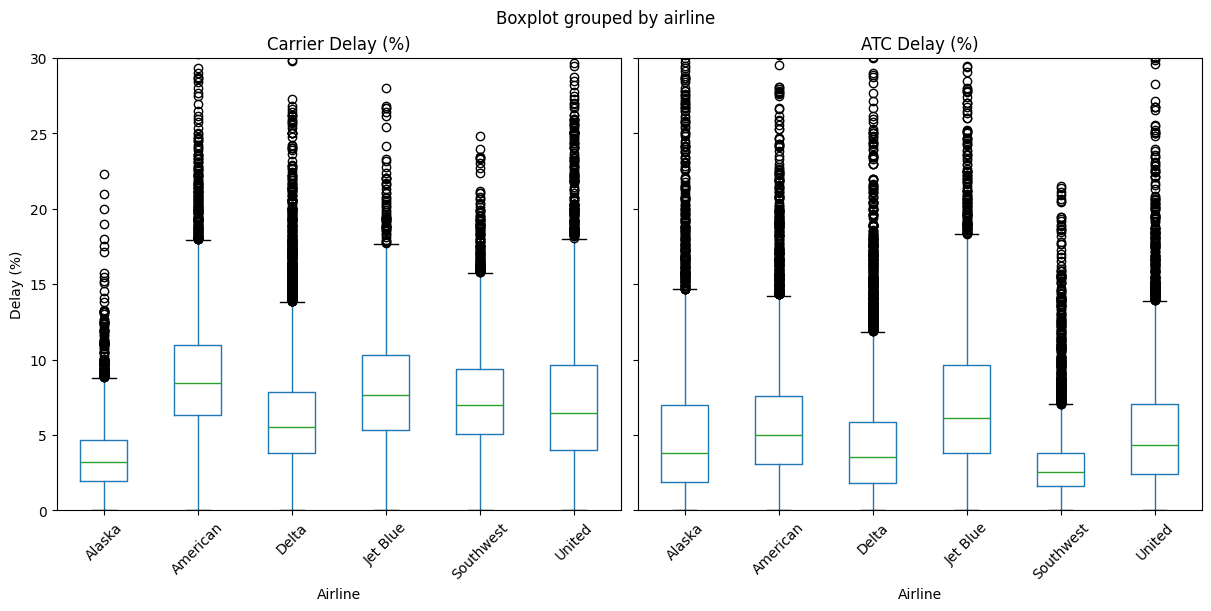

In [ ]:
#2. 박스플롯
# - 전체, 항공사별 분석
#분석 결과

df.dropna() # 결측치 제거
# 1) 데이터 로드 및 결측치 제거
df_clean = df.dropna(subset=['pct_carrier_delay', 'pct_atc_delay'])

# 2) 서브플롯 생성: 1행 2열, y축 공유
fig, axes = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(12, 6),
    sharey=True,
    constrained_layout=True
)

# 3) 그릴 지연 유형과 제목 정의
metrics = ['pct_carrier_delay', 'pct_atc_delay']
titles  = ['Carrier Delay (%)',   'ATC Delay (%)']

# 4) 각 서브플롯에 boxplot 그리기
for ax, metric, title in zip(axes, metrics, titles):
    df_clean.boxplot(
        column=metric,
        by='airline',
        ax=ax,
        grid=False
    )
    ax.set_title(title)
    ax.set_xlabel('Airline')
    if ax is axes[0]:
        ax.set_ylabel('Delay (%)')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0, 30)
    # y축 범위 0~30으로 고정
   

## 지연시간
알레스카항공사와 델타항공사가 전반적으로 지연시간이 짧아서 항공사 자체나 교통관제에 의한 지연상황에 대해 능숙하다고 예상할 수 있다.

<Figure size 1000x600 with 0 Axes>

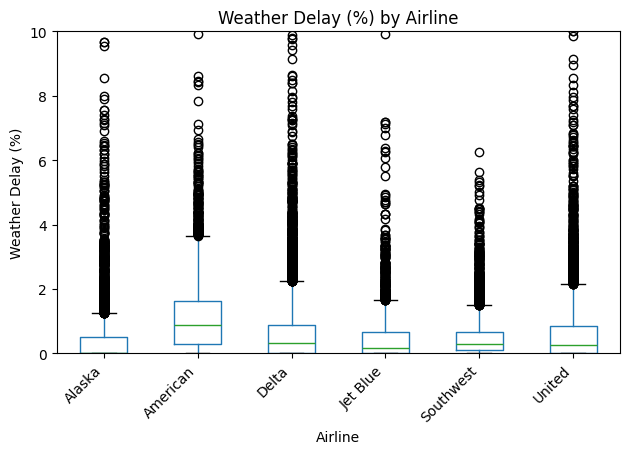

In [48]:
df_clean = df.dropna(subset=['pct_weather_delay'])

# 2) 박스플롯 그리기
plt.figure(figsize=(10, 6))
df_clean.boxplot(
    column='pct_weather_delay',
    by='airline',
    grid=False
)

# 3) 레이아웃 다듬기
plt.title('Weather Delay (%) by Airline')
plt.suptitle('')                       # 자동 부제목 제거
plt.xlabel('Airline')
plt.ylabel('Weather Delay (%)')
plt.ylim(0, 10)                        # y축 범위 0~40으로 고정
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 4) 출력
plt.show()



## 날씨지연
날씨지연의 경우에는 항공사, 관제지연에 비해 지연시간이 짧아서 구간을 짧게 두었다. 

아메리칸 항공사가 날씨지연이 긴걸로 봐서 다른 항공사보다 보수적으로 대처하는 것 같다고 볼 수 있다.

이외의 다른 항공사들은 거의 1분 전후로 크게 의미가 있지는 않다. 

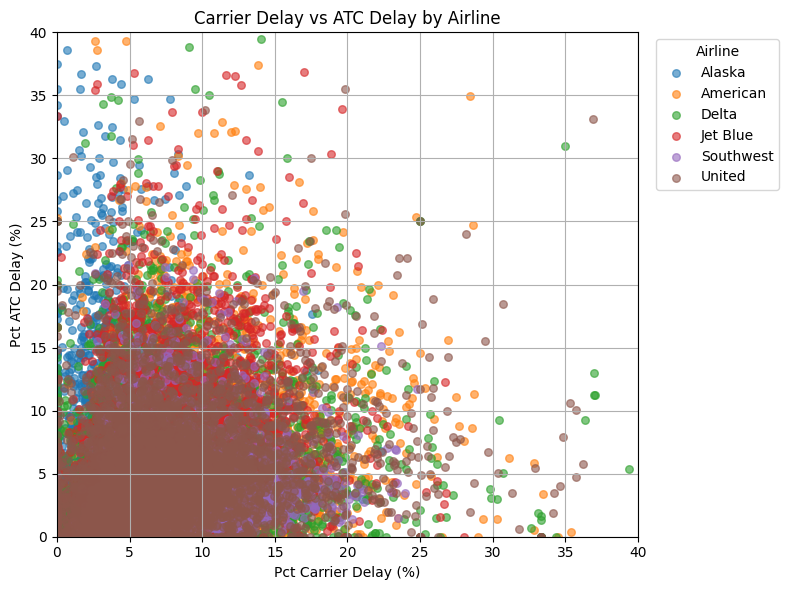

In [ ]:
#3. 추가 분석
#분석결과
#추가분석

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

for airline, grp in df.groupby('airline'):
    plt.scatter(
        grp['pct_carrier_delay'],
        grp['pct_atc_delay'],
        label=airline,
        alpha=0.6,
        s=30
    )

plt.xlabel('Pct Carrier Delay (%)')
plt.ylabel('Pct ATC Delay (%)')
plt.title('Carrier Delay vs ATC Delay by Airline')
plt.legend(title='Airline', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid(True)

# x·y 축 범위 고정
plt.xlim(0, 40)
plt.ylim(0, 40)

plt.tight_layout()
plt.show()



# 산포도를 보면 알 수 있지만 대표적으로 
#PCT Carrier Delay, ACT Carrier Delay는 상관계수가 0.14인데 산포도를 그려보니 역시나 상관관계를 찾아볼 수 없다.

In [49]:
# 상관계수 분석
df1=df.select_dtypes(include='number') #수치 데이터만 고른다.
df1.corr()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,1.000000,0.144474,0.161474
pct_atc_delay,0.144474,1.000000,0.091729
pct_weather_delay,0.161474,0.091729,1.000000


## 상관계수 분석 결과
상관계수 분석 결과 상관계수가 0.5 이상이어야 최소한의미를 가질 수 있는데 상관계수가 
모두 0.2 이하인 것을 보면 관제지연, 항공사지연 ,날씨 지연들을 서로 상관 관계가 거의 없고 독립적이라고 할 수 있다. 

In [30]:
#5. 공분산 확인
df1=df.select_dtypes(include='number') #수치 데이터만 고른다.
df1.cov()
#분석결과

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
pct_carrier_delay,20.228366,3.066107,0.779800
pct_atc_delay,3.066107,22.265627,0.464758
pct_weather_delay,0.779800,0.464758,1.152925


## 추가 분석 계획
#이후 항공사별로 지연시간과 빈도 수간에 어떤 특징이 있는지를 분석할 계획이다
